<a href="https://colab.research.google.com/github/QuiqueCov/Maestria/blob/main/HeartAttackPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imagina que tenemos el siguiente pedido del cliente:

"Tenemos nuevos datos sobre ataques cardiacos, ¿Serias tab amable de ust tus habilidades en ML para crear un predictor de dichos ataques?. Necesitamos que tenga la mejor exactitud posible, no hay problema si nos entregas varios modelos y sus respectivos desempeños.


# Importando las librerias necesarias para la exploracion de datos


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [95]:
data = pd.read_csv('data.csv')

In [96]:
data # imprimo el df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [97]:
data.columns # nombre de las columnas

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [98]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [99]:
data.info() # veo los tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## ¿Que hay en las variables de tipo object?


In [100]:
print(f'Gender : {data.gender.unique()}')# saco los valores unicos
print(f'Ever Married: {data.ever_married.unique()}') # saco los valores unicos
print(f'Work Type: {data.work_type.unique()}') # saco los valores unicos
print(f'Residence Type: {data.Residence_type.unique()}') # saco los valores unicos
print(f'Smoking Status: {data.smoking_status.unique()}') # saco los valores unicos

Gender : ['Male' 'Female' 'Other']
Ever Married: ['Yes' 'No']
Work Type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence Type: ['Urban' 'Rural']
Smoking Status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Una de las cosas que yo puedo notar aqui,es que en lo personal, las variables que creo que no influyen mucho en, si una persona puede tener un atque serian las siguientes:


*   Gender
*   Ever Married
*   Residence Type
*   Work Type
*   id





Las ignorare, sin embargo la variable que considero que podria ser relevante seria,
Smoking status
 para ello utilizare un one hot encoding


In [101]:
df = data.copy()

df = df.drop(['gender', 'ever_married', 'Residence_type', 'work_type', 'id'], axis=1) # limino las columnas

df

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,228.69,36.6,formerly smoked,1
1,61.0,0,0,202.21,NaN,never smoked,1
2,80.0,0,1,105.92,32.5,never smoked,1
3,49.0,0,0,171.23,34.4,smokes,1
4,79.0,1,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,never smoked,0
5106,81.0,0,0,125.20,40.0,never smoked,0
5107,35.0,0,0,82.99,30.6,never smoked,0
5108,51.0,0,0,166.29,25.6,formerly smoked,0


In [102]:
df.info() # saco la info para ver los tipos de dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   avg_glucose_level  5110 non-null   float64
 4   bmi                4909 non-null   float64
 5   smoking_status     5110 non-null   object 
 6   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 279.6+ KB


codificacion de smoking status


In [103]:
# one hot encoding
encoded_df = pd.get_dummies(df, columns=['smoking_status']) # sobre la columna de smoking status
encoded_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,False,True,False,False
1,61.0,0,0,202.21,NaN,1,False,False,True,False
2,80.0,0,1,105.92,32.5,1,False,False,True,False
3,49.0,0,0,171.23,34.4,1,False,False,False,True
4,79.0,1,0,174.12,24.0,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0,False,False,True,False
5106,81.0,0,0,125.20,40.0,0,False,False,True,False
5107,35.0,0,0,82.99,30.6,0,False,False,True,False
5108,51.0,0,0,166.29,25.6,0,False,True,False,False


Otra observacion que vi en este punto fue que existen en bmi valores de tipo nan,

asi que lo que hare sera investigar dentro del df si es que hay mas Nan values en las columnas.

In [104]:
# explorar el DF para ver si hay NaN values
nan_in_df = encoded_df.isnull().sum()
print(nan_in_df)

age                                 0
hypertension                        0
heart_disease                       0
avg_glucose_level                   0
bmi                               201
stroke                              0
smoking_status_Unknown              0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64


Existen registros de tipo NaN Solamente en la columna de BMI,
Primero intentare meter a la matriz de confusion esta vairable sin eliminar los tipo nan y despues eliminandolos para ver si existe alguna diferencia


In [105]:
encoded_df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [106]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             4909 non-null   float64
 5   stroke                          5110 non-null   int64  
 6   smoking_status_Unknown          5110 non-null   bool   
 7   smoking_status_formerly smoked  5110 non-null   bool   
 8   smoking_status_never smoked     5110 non-null   bool   
 9   smoking_status_smokes           5110 non-null   bool   
dtypes: bool(4), float64(3), int64(3)
memory usage: 259.6 KB


# Matriz de correlacion

algo IMPORTANTE que aprendi en este cuatrimestre es que podemos usar la matriz de correlacion para realizar, por asi decirlo otro filtrado, asi que la usare.


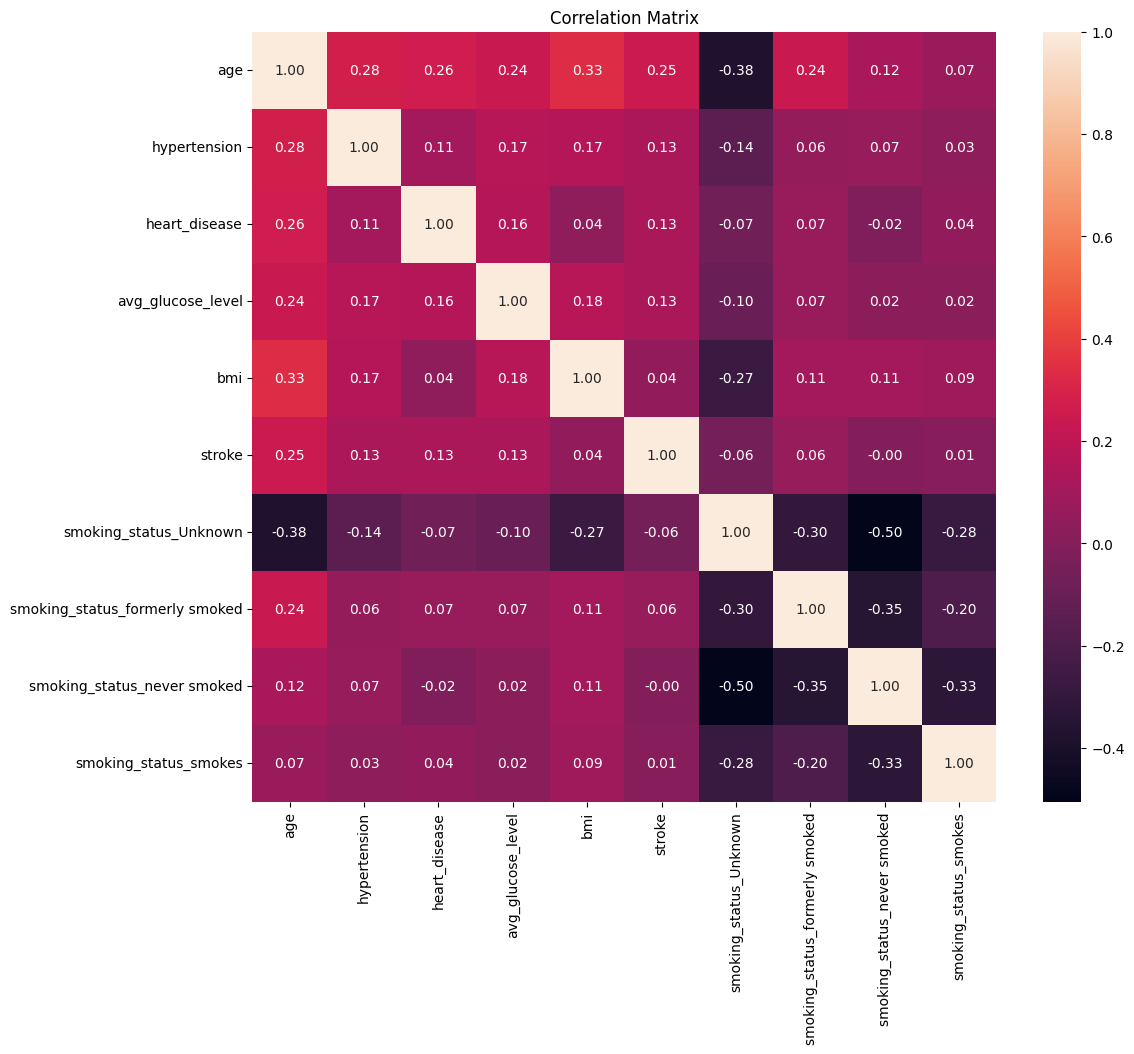

In [107]:
corr = encoded_df.corr()# saco la correlacion
plt.figure(figsize=(12,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True, fmt = ".2f")

plt.title("Correlation Matrix")
plt.show()


Ahora sin los nan


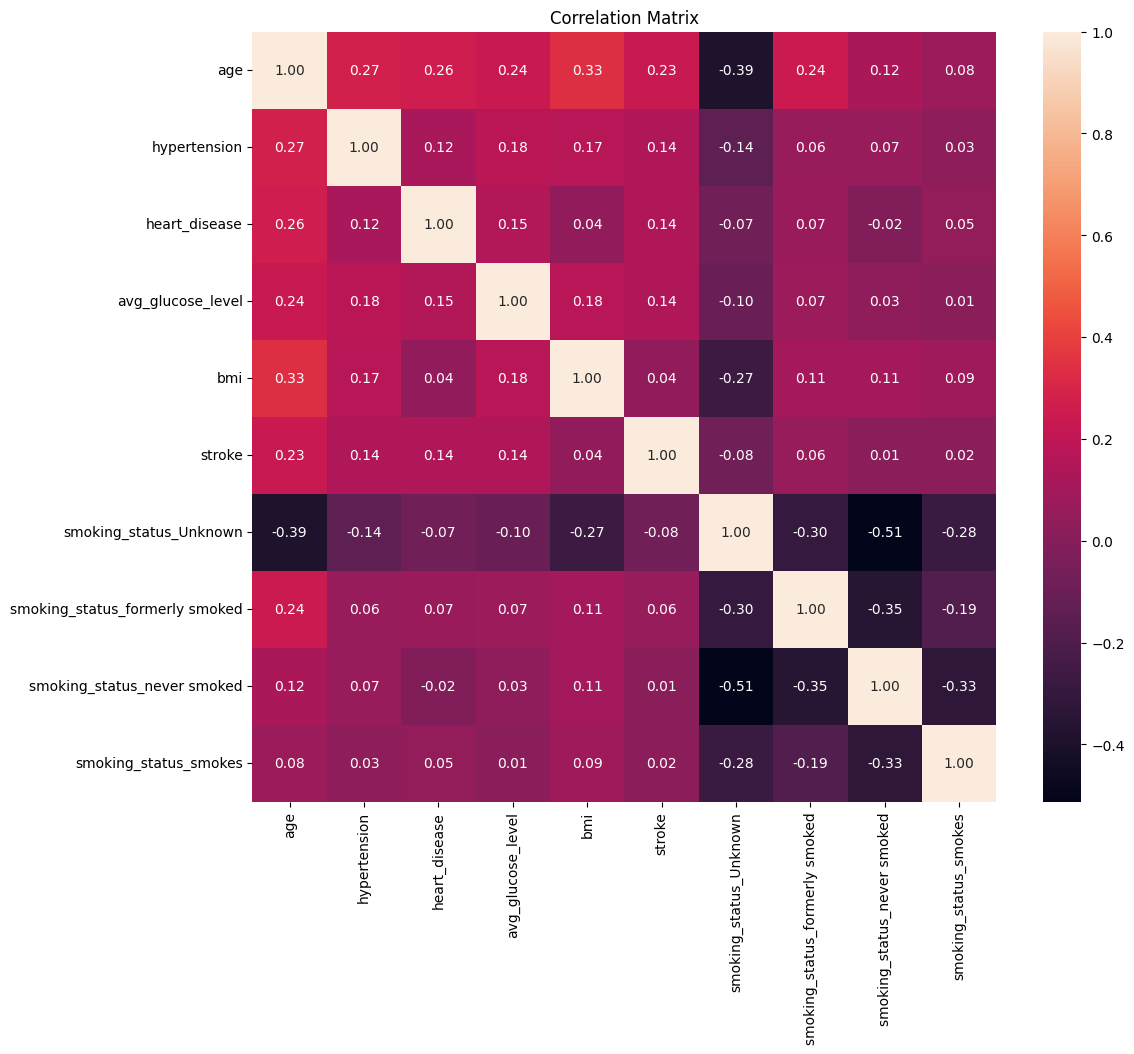

In [108]:
df2 = encoded_df.dropna() # limino los Nan
corr = df2.corr() # saco la correlacion
plt.figure(figsize=(12,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True, fmt = ".2f")

plt.title("Correlation Matrix")
plt.show()

En base a este analisis anterior considero que no es relevante tenerlos o eliminarlos.

Sin embargo los eliminare para que no pueda existir errores en las regresiones ya que estas no permiten datos tipo nan.

# Segmentacion de datos en test y train
Ahora separare los datos con el fin de entrenar los distintos modelos que usare

In [109]:
strokesDf = df2.copy() # hago la copia de el df

aux = strokesDf.drop(columns = ['stroke']) # selecciono la informacion que no contiene si le dio un infarto o no
columnsStroke = list(aux.columns)
X = np.asarray(aux)
y = np.asarray(strokesDf['stroke']).reshape(-1,1) # aqui esta la info si le dio un infaro o no
print(X.shape)
print(y.shape)

(4909, 9)
(4909, 1)


Division de los datos en test y train


In [110]:
from sklearn.model_selection import train_test_split # importo el train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Regresion Lineal



In [111]:
from sklearn.linear_model import LinearRegression # importo la regression lineal
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

Puntaje

In [112]:
# Puntaje de la regresion lineal
from sklearn.metrics import r2_score, accuracy_score

linearTrainScore = linear.score(X_train, y_train)
linearTestScore = linear.score(X_test, y_test)

print(f'Train: {linearTrainScore}')
print(f'Test: {linearTestScore}')

# que tan bueno predecimos?
y_pred = linear.predict(X_test)

# R2_SCORE

linearR2Score = r2_score(y_test, y_pred)
print(f'R2 Score: {linearR2Score}')

Train: 0.06827665376535663
Test: 0.07665133985492978
R2 Score: 0.07665133985492978


# Logistic Regression


In [113]:
from sklearn.linear_model import LogisticRegression # importo la regression logistica
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [114]:
# Puntaje de la regresion lineal
print(f'Train: {logReg.score(X_train, y_train)}')
print(f'Test: {logReg.score(X_test, y_test)}')

# que tan bueno predecimos?
y_pred = logReg.predict(X_test)

# ACCURACY SCORE
logRegAccuracyScore = accuracy_score(y_test, y_pred)# aqui saco el accuracy score

print(f'Accuracy Score: {logRegAccuracyScore}')


Train: 0.9609507640067911
Test: 0.9526476578411406
Accuracy Score: 0.9526476578411406


#Support Vector Machine

In [115]:
from sklearn.svm import SVC  # aqui hago el import de svc
svm = SVC()
svm.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [116]:
# Puntaje de la regresion lineal
print(f'Train: {svm.score(X_train, y_train)}')
print(f'Test: {svm.score(X_test, y_test)}')

# que tan bueno predecimos?
y_pred = svm.predict(X_test)

# ACCURACY SCORE
svmRegAccuracyScore = accuracy_score(y_test, y_pred) # aqui saco el accuracy score
print(f'Accuracy Score: {svmRegAccuracyScore}')

Train: 0.9606112054329372
Test: 0.9526476578411406
Accuracy Score: 0.9526476578411406


#Conclusion

De acuerdo a los 3 modelos que utilice para esta practica yo usaria los siguientes, cualquiera de los dos :
- SVM-SVC:
    * Train: 0.9606112054329372
    * Test: 0.9526476578411406
    * Accuracy Score: 0.9526476578411406
- Logistic Regression:
    * Train: 0.9609507640067911
    * Test: 0.9526476578411406
    * Accuracy Score: 0.9526476578411406

y NO USARIA EL Lineal:
- Lineal
 * Train: 0.06827665376535663
 * Test: 0.07665133985492978
 * R2 Score: 0.07665133985492978
